In [5]:
import sys
sys.path.insert(0, '../')
import database as db
from torchvision import transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [6]:
fruits_file = 'Dataset/dataset_index.csv'
textures_file = 'Dataset/textures_index.csv'
fruits_path = 'Dataset/fruits-360'
textures_path = 'Dataset/textures'

In [7]:
fruits_avocado = db.FruitsDataset(csv_file=fruits_file, cl='Strawberry')
fruits_orange = db.FruitsDataset(csv_file=fruits_file, cl='Orange')
textures = db.TexturesDataset(csv_file=textures_file)
test = db.FruitsDataset(csv_file=fruits_file, cl='Strawberry', 
                        transform = transforms.Compose([db.ChangeBackground(textures)]))

TypeError: __init__() got an unexpected keyword argument 'cl'

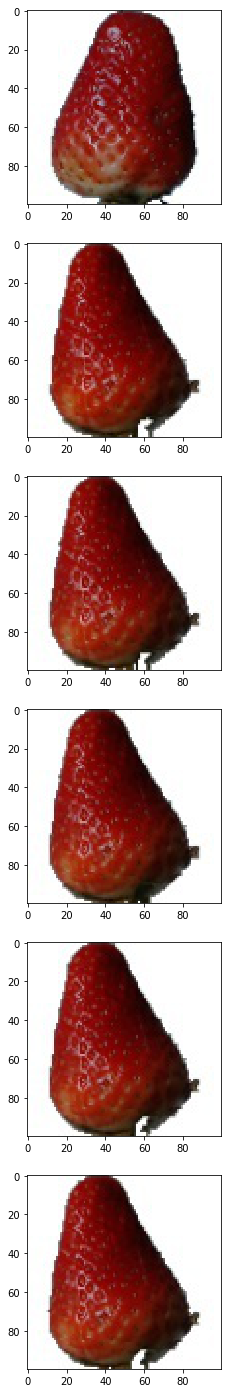

In [4]:
fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(10,25))

for i in range(len(fruits_avocado)):
    sample = fruits_avocado[i]
    ax[i].imshow(sample)
    if i == 5:
        plt.show()
        break

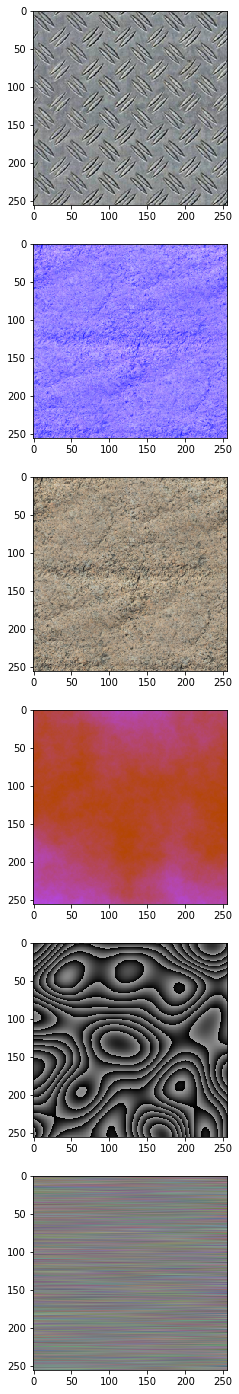

In [5]:
fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(10,25))

for i in range(len(textures)):
    sample = textures[i]
    ax[i].imshow(sample)
    if i == 5:
        plt.show()
        break

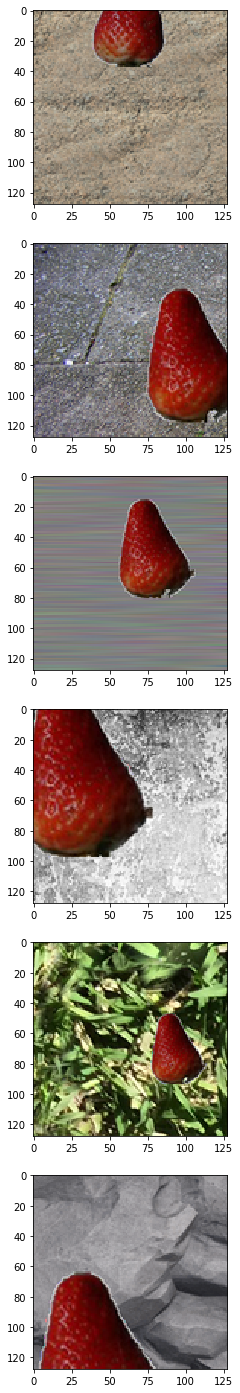

In [6]:
fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(10,25))

for i in range(len(test)):
    sample = test[i]
    ax[i].imshow(sample+0.5)
    if i == 5:
        plt.show()
        break

## Use dataloader for loading batches of data randomly

In [7]:
dataloader = DataLoader(test, batch_size=20,
                        shuffle=True, num_workers=4)

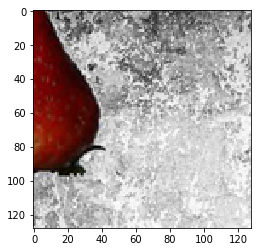

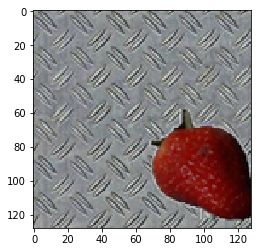

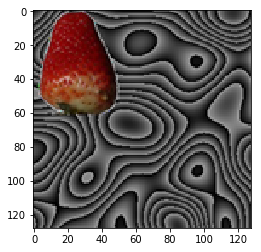

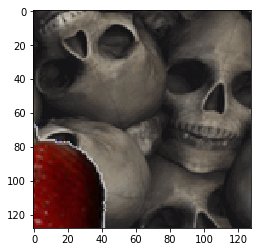

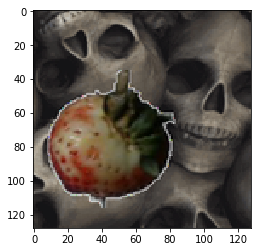

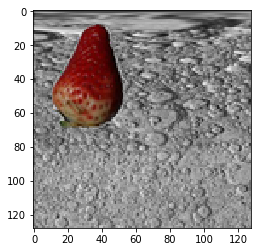

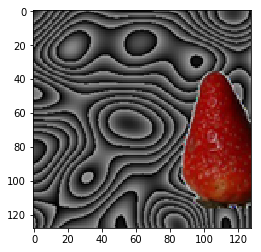

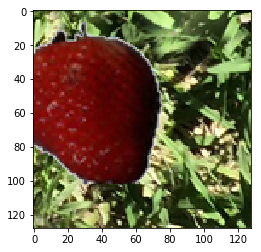

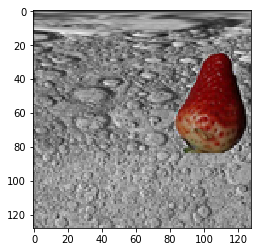

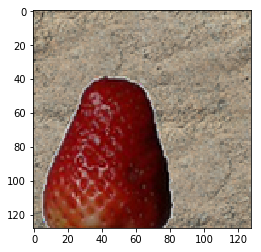

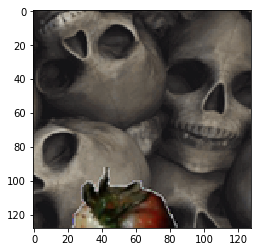

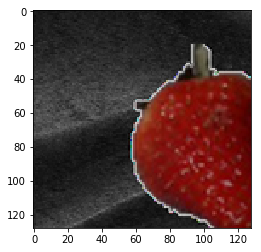

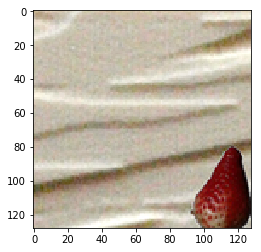

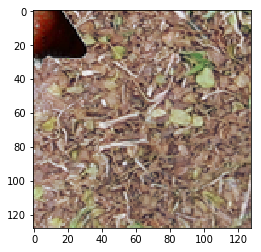

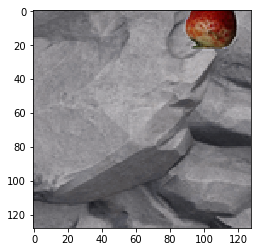

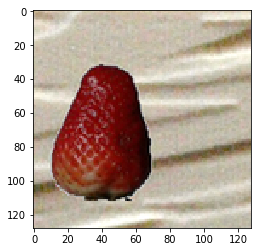

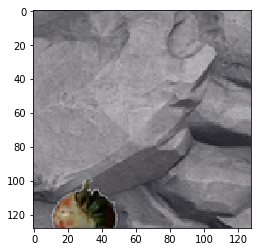

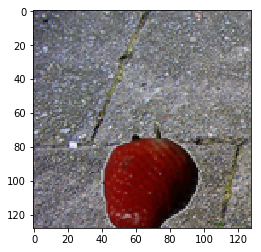

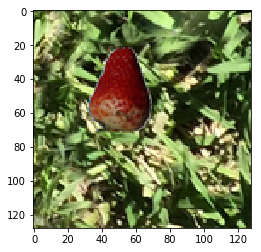

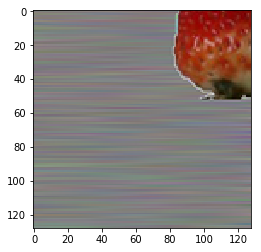

In [8]:
import numpy as np
for i_batch, sample_batched in enumerate(dataloader):
    # We plot the 5th batch
    if i_batch == 5:
        for j in range(sample_batched.size()[0]):
            plt.imshow(np.array((sample_batched[j]+0.5) * 255.0).astype(int))
            plt.show()
            